In [1]:
# importing all necessary lib's
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score # model selection

from sklearn.preprocessing import StandardScaler,LabelEncoder 

from sklearn.metrics import mean_squared_error,r2_score # metrics

from sklearn.feature_selection import SelectPercentile,chi2 # feature selecction

from scipy.stats import zscore # outliers


import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv file
data=pd.read_csv('abalone_data.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data['Age']=data['Rings']+1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [4]:
data.shape

(4177, 10)

In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [6]:
#Encoding the data
le=LabelEncoder()
data.Sex=le.fit_transform(data.Sex)

In [7]:
data[data['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,1,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,9.5
3996,1,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,7.5


In [8]:
data['Height']=data['Height'].replace(0,data['Height'].mean())
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.822240,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [9]:
# columns in dataset
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [10]:
# unique classes in target column
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [11]:
data.Rings.value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [12]:
data.Sex.value_counts().sort_index()

0    1307
1    1342
2    1528
Name: Sex, dtype: int64

In [13]:
print("Female '0':",data.Sex.value_counts()[0])
print("Infant '1':",data.Sex.value_counts()[1])
print("Male '2':",data.Sex.value_counts()[2])

Female '0': 1307
Infant '1': 1342
Male '2': 1528


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 310.1 KB


In [15]:
data.Sex=data.Sex.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 326.5 KB


<AxesSubplot:xlabel='Rings', ylabel='count'>

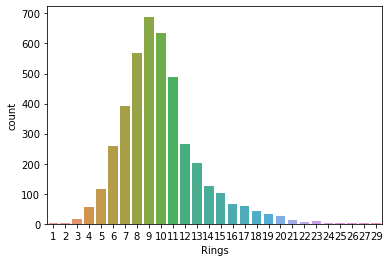

In [16]:
# visualization of Taget value
import matplotlib.pyplot as plt
import seaborn as snc
snc.countplot(x='Rings',data=data)

In [17]:
# correlation with target
data.corr()['Rings'].abs().sort_values(ascending=False)

Age               1.000000
Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557502
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex               0.034627
Name: Rings, dtype: float64

In [18]:
data.corr()['Age'].abs().sort_values(ascending=False)

Age               1.000000
Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557502
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex               0.034627
Name: Age, dtype: float64

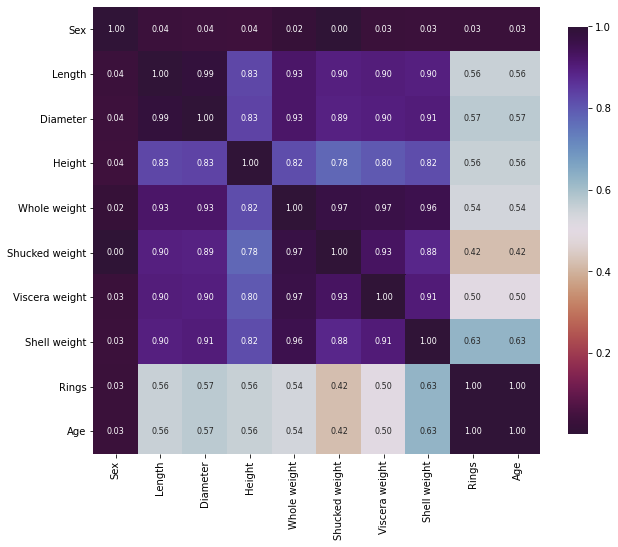

In [19]:
# multivariate analysis
# Heatmap
plt.figure(figsize=(10,10))
snc.heatmap(data.corr().abs(),square=True,fmt='.2f',cbar=True,cbar_kws={'shrink':.75},annot=True,annot_kws={'size':8},cmap='twilight_shifted_r')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

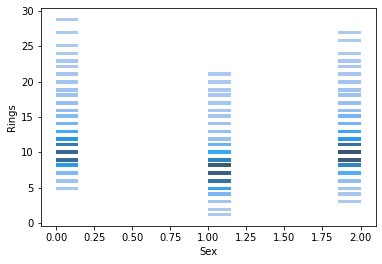

In [20]:
snc.histplot(x='Sex',y='Rings',data=data)

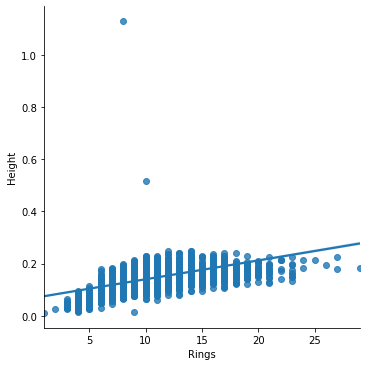

In [21]:
snc.lmplot(x='Rings',y='Height',data=data)

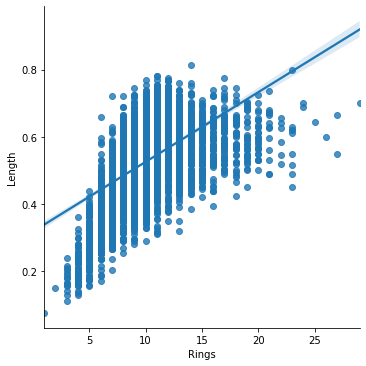

In [22]:
snc.lmplot(x='Rings',y='Length',data=data)

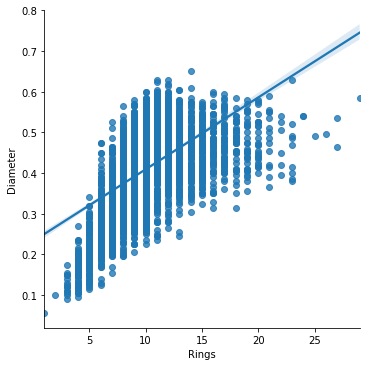

In [23]:
snc.lmplot(x='Rings',y='Diameter',data=data)

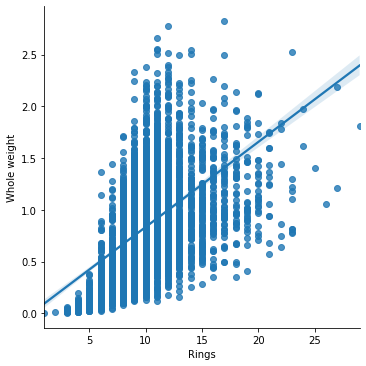

In [24]:
snc.lmplot(x='Rings',y='Whole weight',data=data)

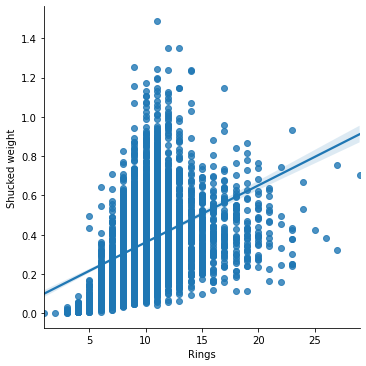

In [25]:
snc.lmplot(x='Rings',y='Shucked weight',data=data)

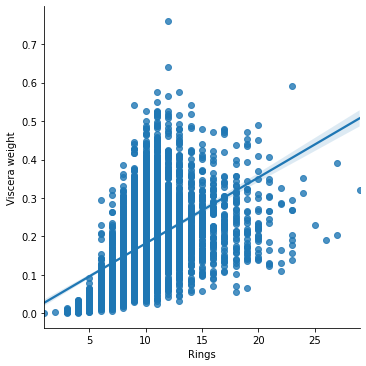

In [26]:
snc.lmplot(x='Rings',y='Viscera weight',data=data)

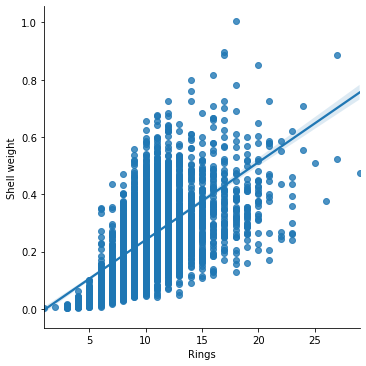

In [27]:
snc.lmplot(x='Rings',y='Shell weight',data=data)

###### univariate analysis

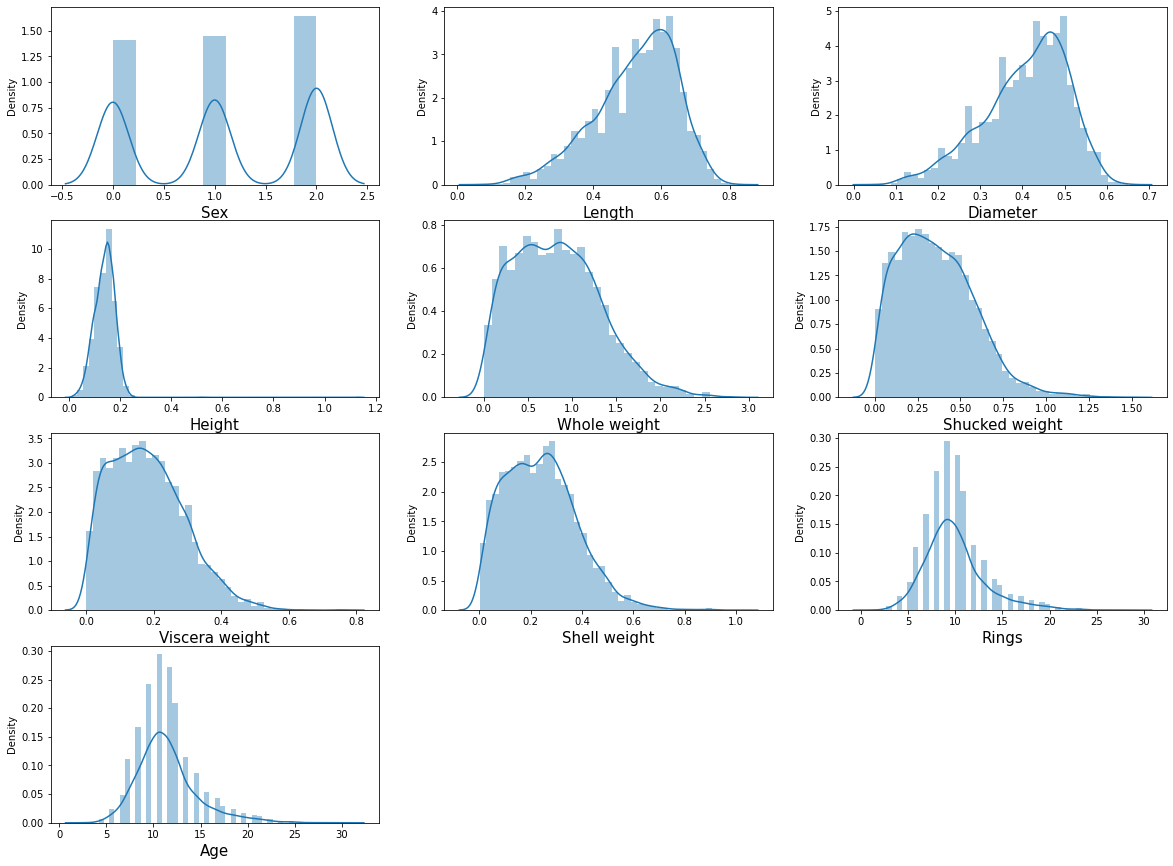

In [28]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        snc.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

###### bivariate analysis

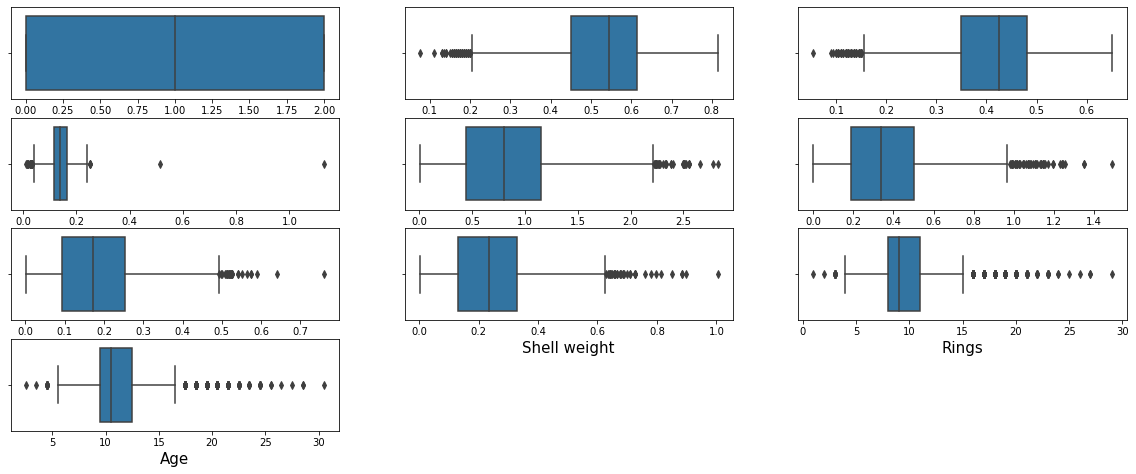

In [29]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        snc.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

###### outliers removing and visualization


In [30]:
data=data.rename(columns={"Whole weight":"Whole_weight","Shucked weight":"Shucked_weight","Viscera weight":"Viscera_weight","Shell weight":"Shell_weight"})
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Age'],
      dtype='object')

In [31]:
q1= data.quantile(.25)
q3= data.quantile(.75)
iqr=q3-q1

In [32]:
# removing lower side one outlier from length column
index=np.where(data['Length'] < (q1.Length - (1.5 * iqr.Length)))
data=data.drop(data.index[index])

In [33]:
# removing lower side one outlier from diameter column
index=np.where(data['Diameter'] < (q1.Diameter - (1.5 * iqr.Diameter)))
data=data.drop(data.index[index])

In [34]:
# removing lower side one outlier from heigth column
index=np.where(data['Height'] < (q1.Height - (1.5 * iqr.Height)))
data=data.drop(data.index[index])

In [35]:
# removing higher side one outlier from heigth column
index=np.where(data['Height'] > (q3.Height + (1.5 * iqr.Height)))
data=data.drop(data.index[index])

In [36]:
# removing higher side one outlier from whole_weigth column
index=np.where(data['Whole_weight'] > (q3.Whole_weight + (1.5 * iqr.Whole_weight)))
data=data.drop(data.index[index])

In [37]:
# removing higher side one outlier from viscera_weigth column
index=np.where(data['Viscera_weight'] > (q3.Viscera_weight + (1.5 * iqr.Viscera_weight)))
data=data.drop(data.index[index])

In [38]:
# removing higher side one outlier from shell_weigth column
index=np.where(data['Shell_weight'] > (q3.Shell_weight + (1.5 * iqr.Shell_weight)))
data=data.drop(data.index[index])

In [39]:
# removing higher side one outlier from shucked_weigth column
index=np.where(data['Shucked_weight'] > (q3.Shucked_weight + (1.5 * iqr.Shucked_weight)))
data=data.drop(data.index[index])

In [40]:
data.reset_index()
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [41]:
data.shape

(4026, 10)

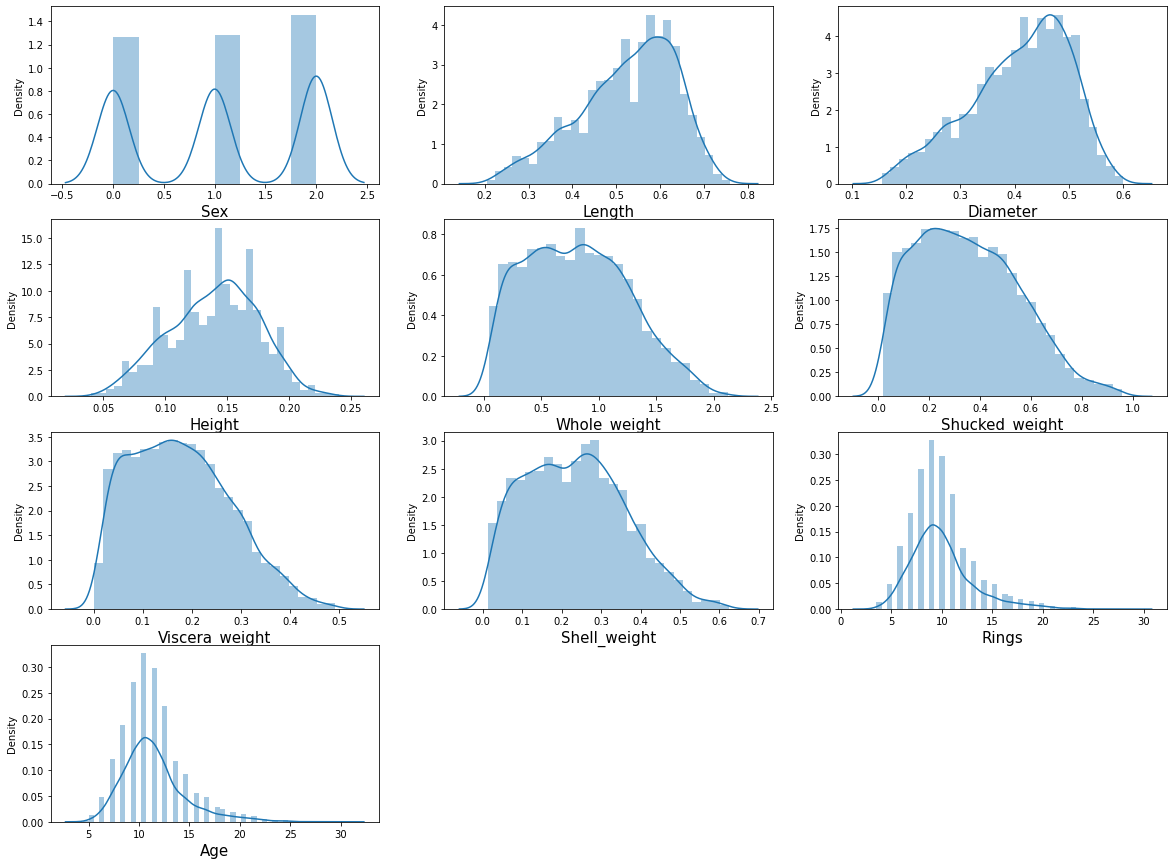

In [42]:
# visualization after outliers removing
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        snc.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

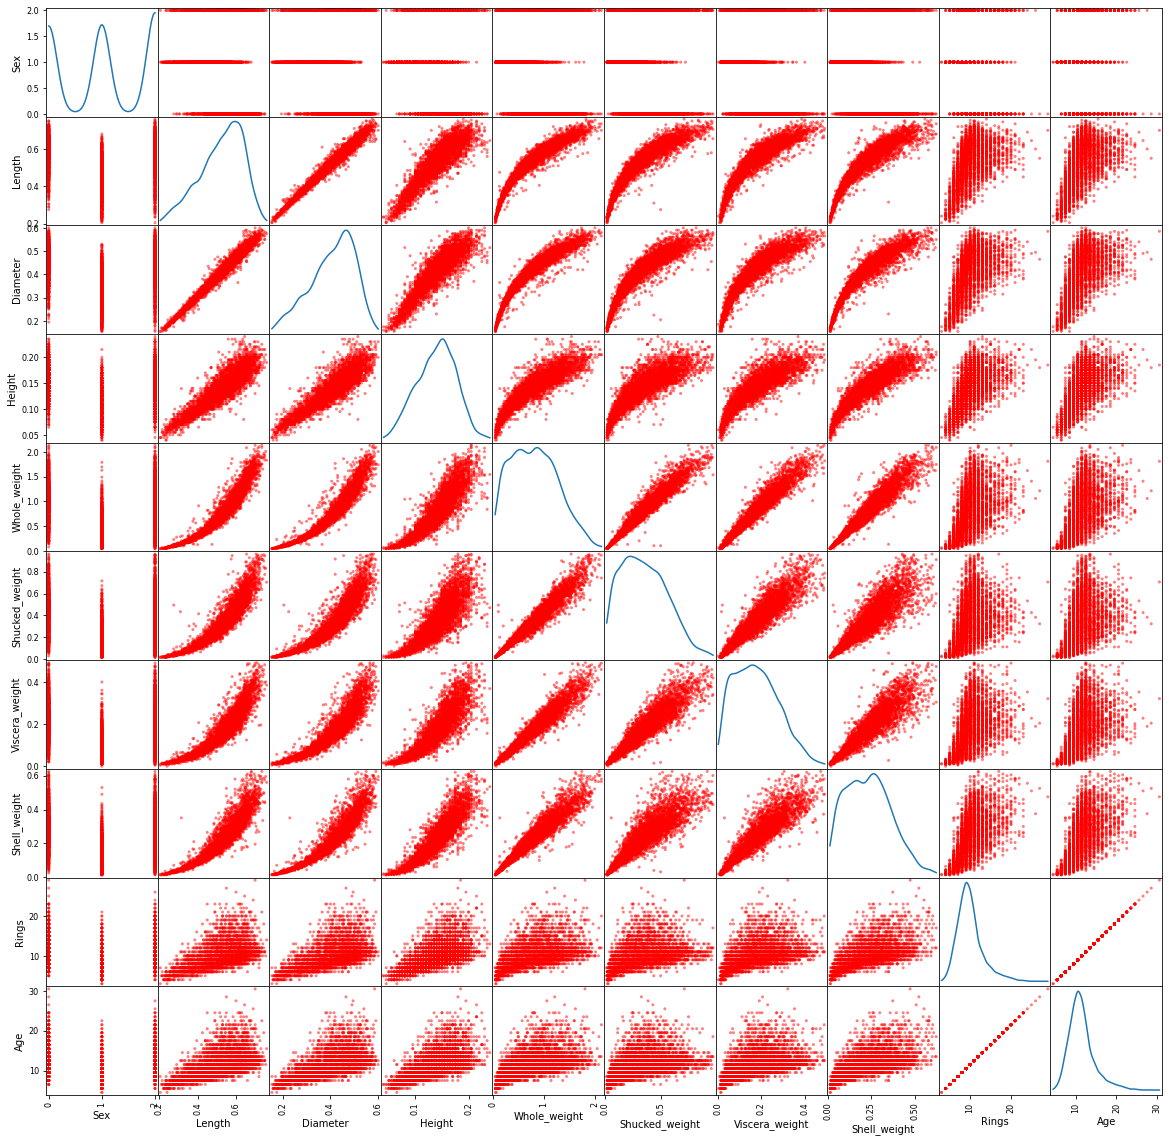

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20),diagonal='kde',color='r')
plt.show()

In [44]:
x=data.drop(['Rings','Age'],axis=1)
y=data.Age

###### standardization

In [45]:
# scaling new data 
scaler=StandardScaler() 
x_scales=scaler.fit_transform(x)

###### finding best random state

In [46]:
# models
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [47]:
# finding best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    train_score=lr.score(x_train,y_train)
    test_score=lr.score(x_test,y_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('max score:',maxacc*100,'\nmax random state:',maxrs,'\ntrain score:',train_score*100,'\ntest score:',test_score*100)

max score: 56.49032833506442 
max random state: 118 
train score: 50.61551697908293 
test score: 52.42238275712652


In [48]:
# train test split for best random state
x_train,x_test,y_train,y_test=train_test_split(x_scales,y,test_size=.25,random_state=118)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3019, 8), (3019,), (1007, 8), (1007,))

# Models

In [49]:
# LinearRegression model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)

print('\nmean squared error :{mean_squared_error(y_test,pred)}')
print('\nmodel accuracy:',acc)
print('train score:',train_score)
print('test score:',test_score)


mean squared error :{mean_squared_error(y_test,pred)}

model accuracy: 0.5649032833506453
train score: 0.49168410591328016
test score: 0.5649032833506453


In [50]:
# --------------------------decisiontree regressor model--------------------------  
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=dtr.score(x_train,y_train)
test_score=dtr.score(x_test,y_test)

In [51]:
# -----------------------AdaBoost regressor model------------------------------------------
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=abr.score(x_train,y_train)
test_score=abr.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------AdaBoost Regressor------------------

mean squared error :7.232367692775335

model accuracy:29.27%
train score:26.22%
test score:29.27%


In [52]:
# -----------------------Random Forest regressor model-----------------------------------
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rfr.score(x_train,y_train)
test_score=rfr.score(x_test,y_test)
print('--------------------------Random Forest Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')


--------------------------Random Forest Regressor------------------

mean squared error :4.592379145978152

model accuracy:55.09%
train score:92.85%
test score:55.09%


In [53]:
#------------------------ Support Vector regressor model--------------------------------
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=svr.score(x_train,y_train)
test_score=svr.score(x_test,y_test)
print('--------------------------Support Vector Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------Support Vector Regressor------------------

mean squared error :4.548762820881045

model accuracy:55.52%
train score:51.78%
test score:55.52%


In [54]:

# -------------------------KNeighbors regressor model---------------------------------
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=knr.score(x_train,y_train)
test_score=knr.score(x_test,y_test)
print('--------------------------KNeighbors Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')


--------------------------KNeighbors Regressor------------------

mean squared error :5.240158887785501

model accuracy:48.75%
train score:63.01%
test score:48.75%


In [55]:

print('--------------------------Decision Tree Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')


--------------------------Decision Tree Regressor------------------

mean squared error :5.240158887785501

model accuracy:48.75%
train score:63.01%
test score:48.75%


###### applying lasso and ridge 

In [56]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)
alpha=lassocv.alpha_
print('alpha:',alpha)

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lasso_reg.score(x_train,y_train)
test_score=lasso_reg.score(x_test,y_test)
print('-----------lasso------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

alpha: 3.3425206308887684e-05
-----------lasso------------------

mean squared error :4.449304021506568

model accuracy:56.49%
train score:49.17%
test score:56.49%


In [57]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)
alpha=ridcv.alpha_
print('alpha:',alpha)

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rid_reg.score(x_train,y_train)
test_score=rid_reg.score(x_test,y_test)
print('-------------Ridge------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

alpha: 0.001
-------------Ridge------------------

mean squared error :4.449141741388434

model accuracy:56.49%
train score:49.17%
test score:56.49%


###### appling cross validation

In [58]:
# try to improve accuracy through cross validation  
m=[lr,dtr,knr,svr,rfr,abr] #scaled for other models for cross validation
for i in m:
    scr_=cross_val_score(i,x_scales,y,cv=5)
    print('----------',i,'------------')
    print(f'cross validation score:{scr_.mean()*100:.2f}\n') 

---------- LinearRegression() ------------
cross validation score:37.19

---------- DecisionTreeRegressor() ------------
cross validation score:-24.17

---------- KNeighborsRegressor() ------------
cross validation score:34.86

---------- SVR() ------------
cross validation score:45.53

---------- RandomForestRegressor() ------------
cross validation score:39.58

---------- AdaBoostRegressor() ------------
cross validation score:-33.05



###### Hyperparameter Tuning

In [61]:
# SVR model has the least differnce  

parameters={'kernel':['linear','poly','sigmoidal'],
           'gamma':['scale','auto','float']}

gs=GridSearchCV(svr,parameters)
gs.fit(x_train,y_train)
print('\n--------------------------Support Vector Regressor Hyperparameter Tuning------------------')
print('best estimators:\n',gs.best_estimator_)

svr_=gs.best_estimator_ # direct applying best estimators
svr_=gs.best_estimator_ # direct applying best estimators
svr_.fit(x_train,y_train)
pred=svr_.predict(x_test)
acc=r2_score(y_test,pred)
train_score=svr_.score(x_train,y_train)
test_score=svr_.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')


--------------------------Support Vector Regressor Hyperparameter Tuning------------------
best estimators:
 SVR(kernel='linear')
--------------------------AdaBoost Regressor------------------

mean squared error :4.657109426103405

model accuracy:54.46%
train score:46.94%
test score:54.46%


###### saving best model

In [62]:
# saving the final model
import pickle
filename='red_wine_best.pkl'
pickle.dump(svr_,open(filename,'wb'))